Purpose: Visualize accuracy scores for models tested on each stressor.<br>
Author: Anna Pardo<br>
Date initiated: July 3, 2023

In [1]:
# import modules
import json
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# load in json files with scores
cs = json.load(open("../../data/rf_outputs/ColdTest_Up_scores.json"))
ds = json.load(open("../../data/rf_outputs/DroughtTest_Up_scores.json"))
hs = json.load(open("../../data/rf_outputs/HeatTest_Up_scores.json"))
ss = json.load(open("../../data/rf_outputs/SaltTest_Up_scores.json"))
fs = json.load(open("../../data/rf_outputs/FloodingTest_Up_scores.json"))

In [6]:
# look at one of the dictionaries
fs

{'Accuracy': 0.6811594202898551,
 'F1_class_0': 0.35294117647058826,
 'F1_class_1': 0.7884615384615384,
 'Precision_class_0': 0.46153846153846156,
 'Precision_class_1': 0.7321428571428571,
 'Recall_class_0': 0.2857142857142857,
 'Recall_class_1': 0.8541666666666666,
 'AUC': 0.6577380952380952}

In [7]:
# put the dictionaries in a list
dlist = [cs,ds,hs,ss,fs]

In [8]:
# make a list (same order as the dict list) of treatments
tlist = ["Cold","Drought","Heat","Salt","Flooding"]

In [9]:
# for each dict, pull out accuracy score and put it in a list, then make a dataframe with the treatment list
alist = []
for d in dlist:
    alist.append(d.get("Accuracy"))
accdf = pd.DataFrame(list(zip(tlist,alist)),columns=["Test Set","Accuracy"])
accdf

,Test Set,Accuracy
0,Cold,0.531646
1,Drought,0.749746
2,Heat,0.438287
3,Salt,0.857143
4,Flooding,0.681159


In [10]:
# calculate the mean accuracy
macc = sum(accdf["Accuracy"])/len(accdf.index)
macc

0.6515961354411733

In [14]:
# add mean accuracy as a column to the dataframe
accdf["Mean Accuracy"] = macc
accdf

,Test Set,Accuracy,Mean Accuracy
0,Cold,0.531646,0.651596
1,Drought,0.749746,0.651596
2,Heat,0.438287,0.651596
3,Salt,0.857143,0.651596
4,Flooding,0.681159,0.651596


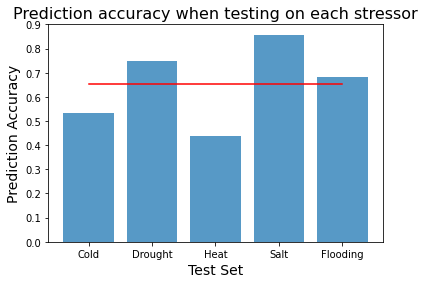

In [31]:
# plot the data
plt.bar(accdf["Test Set"],accdf["Accuracy"],alpha=0.75)
plt.plot(accdf["Mean Accuracy"],color="red")
plt.xlabel("Test Set",fontsize=14)
plt.ylabel("Prediction Accuracy",fontsize=14)
plt.title("Prediction accuracy when testing on each stressor",fontsize=16)
plt.savefig("../../figures/rf_results/accuracy-per-stressor.pdf")